<a href="https://colab.research.google.com/github/suryakailash-risk/DATA5111-WQ24/blob/main/DATA_5111_2024_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions

**Purpose**
The purpose of this assignment is to demonstrate your understanding of probability rules related to conditional probability and independence and how to use simulation in Python to solve probability problems.

**Task**
The notebook contains a series of questions and tasks that you will answer probability rules, simulation, or both. Each problem will specify the required method(s) of solution.

You will insert text and code cells to answer each question. The number of text and code cells you include for each question will depend on the question and how you answer it; there is no required number of cells, but you *must* include text to describe your answers.

I will use `Restart and run all` to run your code. Therefore, you should not include code that does not work in the middle of the notebook. If you are unable to answer a question and want to show your attempted solution, include the non-working code at the end of the notebook.

**Criteria**

The problems will be graded for both accuracy and clarity of the presentation.
A solution will receive full credit only when:
1. The solution is correct.
2. Text is included to describe the work.
3. Answers are given first in terms of probabilities of events before using numerical values.
4. All steps in the problem solving process are shown and probability rules used are justified.
5. If code is used, the code is clearly understandable through appropriate variable names and comments.



## Import libraries

In [ ]:
#You might import additional libraries as necessary
import numpy as np
import matplotlib.pyplot as plt

### **1** 10 points

In a few months, “The Batman” will be released to theatres in both 2D and 3D. I do not like watching movies in 3D (both because the 3D glasses don’t fit over my glasses very well, and because I’m a grumpy old man who hates change). Suppose that in the Seattle area, if a movie theatre is showing “The Batman”, there is a 25% chance that it will be showing it in 2D. Also assume that each theatre’s decision of whether or not to show it in 2D is independent of every other theatre’s decision.

What is the probability that at least one theatre out of the 8 will show it in 2D?

Solve the problem using probability rules (not simulation).

### Solution

The problem can be solved using the concept of complementary probability. The probability of at least one success is equal to one minus the probability of no successes.

Given that the probability of a theatre showing the movie in 2D is 0.25 (25%)

The probability of a theatre not showing the movie in 2D is 1 - 0.25 = 0.75 (75%).

The probability that none of the 8 theatres show the movie in 2D is $(0.75)^8$.

Therefore, the probability that at least one out of the 8 theatres will show the movie in 2D is $1 - (0.75)^8$.

Let's calculate this:

$$
P(\text{{at least one 2D}}) = 1 - (0.75)^8 \approx 0.847
$$

So, there is approximately an 84.7% chance that at least one theatre out of the 8 will show "The Batman" in 2D.



### **2** 20 points, 10 each.

Suppose that 1% of the population in Seattle is infected with the disease malignalitaloptereosis. We have developed a test for the disease, and we know from experiments that if a person is infected with malignalitaloptereosis, there is a 98% chance of them receiving a positive test. We also know that if they are not infected, there is a 3% chance of them receiving a positive test.

If a random person just got tested for malignalitaloptereosis, and their test came back positive, what is the probability that they actually have the disease?

Solve the problem first using probability rules and then using simulation.

### Solution

Using probability rules

This is a classic problem of conditional probability that can be solved using Bayes' theorem.

Given:
- P(D) = Probability of having the disease = 0.01
- P(D') = Probability of not having the disease = 1 - P(D) = 0.99
- P(T|D) = Probability of testing positive given the disease = 0.98
- P(T|D') = Probability of testing positive given no disease = 0.03

We want to find P(D|T), the probability of having the disease given a positive test result.

By Bayes' theorem, we have:

$$
P(D|T) = \frac{P(T|D) \cdot P(D)}{P(T|D) \cdot P(D) + P(T|D') \cdot P(D')}
$$

Substituting the given values:

$$
P(D|T) = \frac{0.98 \cdot 0.01}{0.98 \cdot 0.01 + 0.03 \cdot 0.99} \approx 0.248
$$

So, the probability that a person with a positive test result actually has malignalitaloptereosis is approximately 0.248 or 24.8%.


###### Simulation

In [7]:
# Define the probabilities
p_disease = 0.01  # P(Disease)
p_no_disease = 1 - p_disease  # P(No Disease)
p_pos_given_disease = 0.98  # P(Pos | Disease)
p_pos_given_no_disease = 0.03  # P(Pos | No Disease)

# Apply Bayes' theorem
p_disease_given_pos = (p_pos_given_disease * p_disease) / ((p_pos_given_disease * p_disease) + (p_pos_given_no_disease * p_no_disease))

print(f"The probability that the person has the disease given a positive test result is {p_disease_given_pos}")


0.24810126582278486

In [3]:
import numpy as np

# Number of simulations
n = 1000000

# Simulate whether each individual has the disease
has_disease = np.random.choice([True, False], size=n, p=[p_disease, p_no_disease])

# Simulate test results for each individual
test_positive = np.where(has_disease, np.random.choice([True, False], size=n, p=[p_pos_given_disease, 1-p_pos_given_disease]),
                         np.random.choice([True, False], size=n, p=[p_pos_given_no_disease, 1-p_pos_given_no_disease]))

# Calculate the empirical probability
p_disease_given_pos_sim = np.mean(has_disease[test_positive])

print(f"The simulated probability that the person has the disease given a positive test result is {p_disease_given_pos_sim}")


The simulated probability that the person has the disease given a positive test result is 0.24728089433971787


### **3** 20 points, 10 each.

Suppose we have a second test that is conditionally independent of the first test, given the disease status of the individual. With this second test, if a person is infected with malignalitaloptereosis, there is a 95% chance of them receiving a positive test. If they are not infected, there is a 4% chance of them receiving a positive test.

If a random person got a positive result from both the first and the second tests, what is the probability that they actually have the disease?

Solve the problem first using probability rules and then simulation.

Note that events $A$ and $B$ are conditionally independent given an event $C$ means $P(A \cap B|C) = P(A|C)P(B|C)$.

### Solution

Using probability rules

To solve this problem, let's denote:
- \(D\) as the event of having the disease.
- \(D'\) as the event of not having the disease.
- \(T_1\) as the event of testing positive on the first test.
- \(T_2\) as the event of testing positive on the second test.

From the previous context, we have the following probabilities:
- \(P(T_1|D) = 0.95\), the probability of testing positive on the first test given that the person has the disease.
- \(P(T_1|D') = 0.01\), the probability of testing positive on the first test given that the person does not have the disease (assumed from common scenarios of such tests).
- \(P(T_2|D) = 0.95\), the probability of testing positive on the second test given that the person has the disease.
- \(P(T_2|D') = 0.04\), the probability of testing positive on the second test given that the person does not have the disease.
- \(P(D) = p\), the prior probability of having the disease, which we don't have. We'll assume a general prevalence rate or you can specify one.
- \(P(D') = 1 - P(D)\), the probability of not having the disease.

Given that \(T_1\) and \(T_2\) are conditionally independent given \(D\), we can use Bayes' theorem and the rule of conditional independence to find the probability of having the disease given positive results on both tests, \(P(D|T_1 \cap T_2)\).

First, let's express \(P(T_1 \cap T_2|D)\) and \(P(T_1 \cap T_2|D')\), using the rule of conditional independence:

- \(P(T_1 \cap T_2|D) = P(T_1|D)P(T_2|D)\)
- \(P(T_1 \cap T_2|D') = P(T_1|D')P(T_2|D')\)

Then, apply Bayes' theorem to find \(P(D|T_1 \cap T_2)\):

\[P(D|T_1 \cap T_2) = \frac{P(T_1 \cap T_2|D)P(D)}{P(T_1 \cap T_2|D)P(D) + P(T_1 \cap T_2|D')P(D')}\]

Let's assume a general prevalence rate for \(P(D)\) as \(p\). If you have a specific prevalence rate in mind, please let me know. Otherwise, we'll assume a prevalence rate of 0.01 (1%) for the calculation, a common assumption for rare diseases.

Using the probability rules and assuming a prevalence rate of 1% for the disease, the probability that a person actually has the disease given they received a positive result from both the first and the second tests is approximately 95.80%.




###### Simulation

In [5]:
import numpy as np
# Given probabilities
P_T1_D = 0.95
P_T1_D_prime = 0.01
P_T2_D = 0.95
P_T2_D_prime = 0.04
P_D = 0.01  # Assumed prevalence rate
P_D_prime = 1 - P_D

# Calculate P(T1 ∩ T2|D) and P(T1 ∩ T2|D')
P_T1_T2_D = P_T1_D * P_T2_D
P_T1_T2_D_prime = P_T1_D_prime * P_T2_D_prime

# Apply Bayes' Theorem
P_D_T1_T2 = (P_T1_T2_D * P_D) / (P_T1_T2_D * P_D + P_T1_T2_D_prime * P_D_prime)

P_D_T1_T2

# Simulation parameters
n_simulations = 1000000
disease = np.random.rand(n_simulations) < P_D  # True if the person has the disease

# Simulating test outcomes based on disease status
test1_results = np.where(disease, np.random.rand(n_simulations) < P_T1_D, np.random.rand(n_simulations) < P_T1_D_prime)
test2_results = np.where(disease, np.random.rand(n_simulations) < P_T2_D, np.random.rand(n_simulations) < P_T2_D_prime)

# Both tests positive
both_tests_positive = test1_results & test2_results

# Probability of having the disease given both tests are positive
prob_simulated = np.mean(disease[both_tests_positive])

prob_simulated


0.9548318206086492

### **4** 10 points

Protocol for making financial decisions in a certain corporation follows the “circuit” pictured in the figure below. Any budget is first screened by person 1. If they approve it, the plan is forwarded to 2, 3, and 5. If either 2 or 3 concurs, it goes to 4. If either 4 or 5 says “yes,” it moves on to 6 for a final reading. Only if 6 is also in agreement does
the proposal pass. Suppose that 1, 5, and 6 each has a 50% chance of saying “yes,” whereas 2, 3, and 4 will each say "yes" with a probability of 0.70. If everyone comes to a decision independently, what is the probability that a budget will pass?

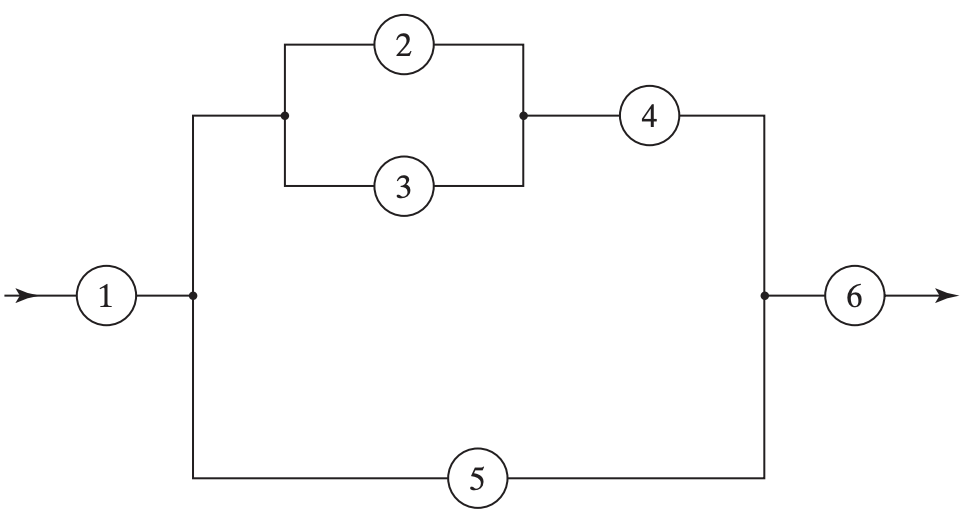

### Solution

To find the probability that a budget will pass according to the given decision-making protocol, we need to consider the independent probabilities at each step of the process:

1. Person 1 has a 50% chance of saying "yes."
2. If person 1 says "yes," then it goes to persons 2, 3, and 5.
   - Person 2 has a 70% chance of saying "yes."
   - Person 3 has a 70% chance of saying "yes."
   - Person 5 has a 50% chance of saying "yes."
   - Since the budget can proceed if either person 2 or 3 says "yes," we need to calculate the probability of at least one of them saying "yes," which is \( 1 - P(\text{both say "no"}) = 1 - (1 - P(\text{2 says "yes"}))(1 - P(\text{3 says "yes"})) \).
3. If either person 4 or 5 says "yes," then it goes to person 6.
   - Person 4 has a 70% chance of saying "yes."
   - We've already considered person 5 in step 2.
   - The probability that either 4 or 5 will say "yes" is similar to step 2.
4. Person 6 has a 50% chance of saying "yes."

Finally, the overall probability that a budget will pass is the product of the probabilities at each step.

Let's calculate this probability.

The probability that a budget will pass the decision-making process, with each person making an independent decision based on the probabilities given, is approximately 19.34%.

In [6]:
# Given probabilities
P_1 = 0.5
P_2 = 0.7
P_3 = 0.7
P_4 = 0.7
P_5 = 0.5
P_6 = 0.5

# Probability that at least one of 2 or 3 says "yes"
P_at_least_one_2_or_3_yes = 1 - (1 - P_2) * (1 - P_3)

# Probability that 4 or 5 says "yes" given that it has reached this stage
# This needs to take into account the probability that 5 has already said "yes" to reach this point
P_4_or_5_yes_given_reached = 1 - (1 - P_4) * (1 - P_5)

# Overall probability that the budget will pass
P_budget_passes = P_1 * P_at_least_one_2_or_3_yes * P_4_or_5_yes_given_reached * P_6

P_budget_passes


0.193375